In [1]:
import nltk

In [2]:
#load the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf
tf.debugging.set_log_device_placement(False) 
import warnings
warnings.filterwarnings('ignore')

In [3]:
tf.random.set_seed(14)

In [4]:
raw_data = pd.read_csv("gas_turbines.csv")
raw_data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [5]:
df = raw_data.copy() 
df = df.drop(['AFDP','GTEP','TIT','TAT','CDP','CO','NOX'],axis=1)
df.head()

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72


In [6]:
df.info() #No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [7]:
df.describe() #We need to normalize the values before modeling

,AT,AP,AH,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,134.188464
std,7.574323,6.41076,13.793439,15.829717
min,0.522300,985.85000,30.344000,100.170000
25%,11.408000,1008.90000,69.750000,127.985000
50%,18.186000,1012.80000,82.266000,133.780000
75%,23.862500,1016.90000,90.043500,140.895000
max,34.929000,1034.20000,100.200000,174.610000


<AxesSubplot:>

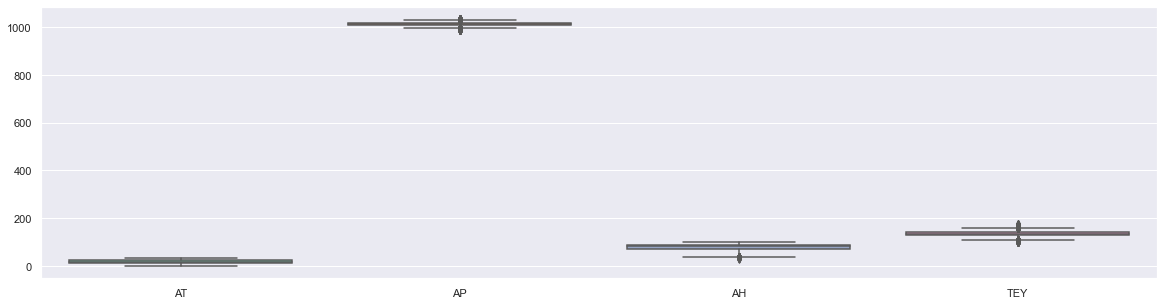

In [8]:
sns.set(rc={'figure.figsize':(20,5)})
sns.boxplot(data=df, orient="v", palette="Set2") 
#No Outliers. But we need to standardize the data

In [9]:

#A common mistake when configuring a neural network is to first normalize the data before splitting the data.
# Reference 5

X =df.iloc[:,:-1]
Y = df.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [10]:
y_train=np.reshape(y_train.to_numpy(), (-1,1)) #https://stackoverflow.com/questions/57192304/numpy-python-exception-data-must-be-1-dimensional
y_test=np.reshape(y_test.to_numpy(), (-1,1))

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)

print(scaler_x.fit(X_test))
xtest_scale=scaler_x.transform(X_test)

print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)

print(scaler_y.fit(y_test))
ytest_scale=scaler_y.transform(y_test)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [12]:
len(xtrain_scale)

10527

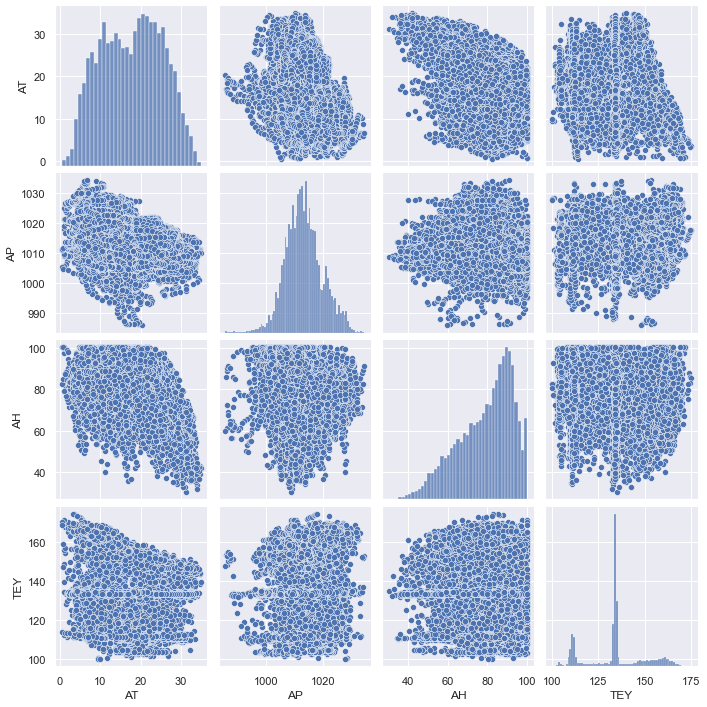

In [13]:
sns.pairplot(df,palette='deep')

In [14]:
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [15]:
import keras
keras. __version__ #init method is not available in this mdethod

'2.5.0'

In [16]:
# create model
model1 = Sequential()
model1.add(Dense(4, input_dim=3, kernel_initializer='normal', activation='relu'))
model1.add(Dense(2106,kernel_initializer='normal', activation='relu'))
model1.add(Dense(1, activation='linear'))

In [17]:
# Compile model
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])

In [18]:
# Fit the model
hist1 = model1.fit(xtrain_scale, ytrain_scale, validation_split=0.33, epochs=100, batch_size=150)
#At epoch 50, mse and mae just keeps oscillating back and forth

Epoch 1/100
48/48 [==============================] - 39s 28ms/step - loss: 0.1134 - mse: 0.1134 - mae: 0.2698 - val_loss: 0.0461 - val_mse: 0.0461 - val_mae: 0.1565
Epoch 2/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0472 - mse: 0.0472 - mae: 0.1604 - val_loss: 0.0456 - val_mse: 0.0456 - val_mae: 0.1533
Epoch 3/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0458 - mse: 0.0458 - mae: 0.1524 - val_loss: 0.0454 - val_mse: 0.0454 - val_mae: 0.1558
Epoch 4/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0456 - mse: 0.0456 - mae: 0.1556 - val_loss: 0.0451 - val_mse: 0.0451 - val_mae: 0.1557
Epoch 5/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0442 - mse: 0.0442 - mae: 0.1501 - val_loss: 0.0445 - val_mse: 0.0445 - val_mae: 0.1514
Epoch 6/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0439 - mse: 0.0439 - mae: 0.1501 - val_loss: 0.0442 - val_mse: 0.0442 - val_mae: 0.1532
Epoch 7/100
48/48 [=

In [19]:
y_predict = model1.predict(xtest_scale)
y_predict

array([[0.5135447 ],
       [0.41360486],
       [0.30177778],
       ...,
       [0.30104232],
       [0.36620772],
       [0.38484454]], dtype=float32)

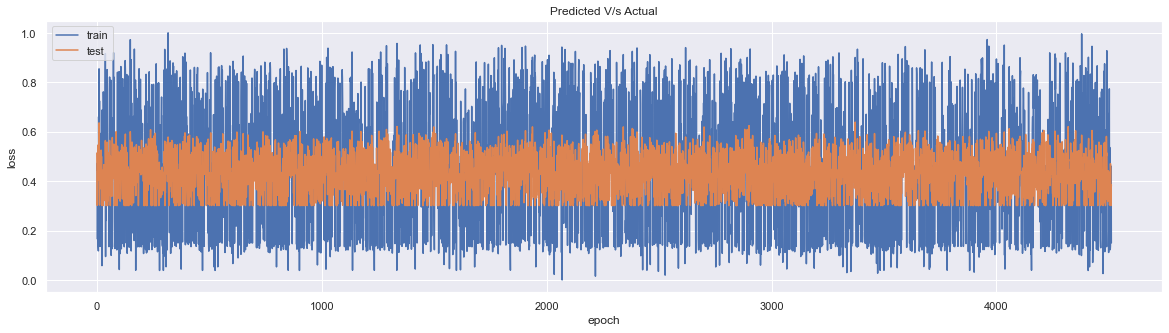

In [20]:
# Comparison of prediction and actual values

plt.plot(ytest_scale)
plt.plot(y_predict)
plt.title('Predicted V/s Actual')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() #Neural Networks is not a good model for predicting a regression problem

In [21]:
print(hist1.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


In [22]:
hist1_df = pd.DataFrame(hist1.history)
hist1_df["epoch"]=hist1.epoch
hist1_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
95,0.039796,0.039796,0.158914,0.039637,0.039637,0.158342,95
96,0.038524,0.038524,0.155177,0.039380,0.039380,0.158447,96
97,0.038889,0.038889,0.155696,0.039102,0.039102,0.158371,97
98,0.038821,0.038821,0.156852,0.039453,0.039453,0.158884,98
99,0.038919,0.038919,0.157116,0.039687,0.039687,0.159806,99


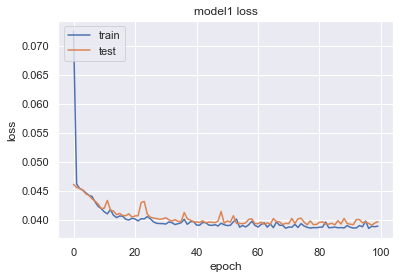

In [23]:
# summarize history for Loss

sns.set(rc={'figure.figsize':(6,4)})

plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

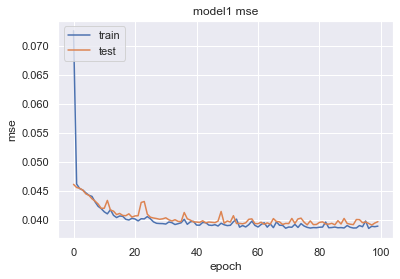

In [24]:
# summarize history for loss
plt.plot(hist1.history['mse'])
plt.plot(hist1.history['val_mse'])
plt.title('model1 mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()